In [ ]:
pip install turicreate

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import turicreate as tc

In [ ]:
sf = tc.SFrame('/content/drive/MyDrive/people_wiki.sframe')
sf

URI,name,text
<http://dbpedia.org/resource/Digby_Morrell> ...,Digby Morrell,digby morrell born 10october 1979 is a former ...
<http://dbpedia.org/resource/Alfred_J._Lewy> ...,Alfred J. Lewy,alfred j lewy aka sandylewy graduated from ...
<http://dbpedia.org/resource/Harpdog_Brown> ...,Harpdog Brown,harpdog brown is a singerand harmonica player who ...
<http://dbpedia.org/resource/Franz_Rottensteiner> ...,Franz Rottensteiner,franz rottensteiner bornin waidmannsfeld lower ...
<http://dbpedia.org/resource/G-Enka> ...,G-Enka,henry krvits born 30december 1974 in tallinn ...
<http://dbpedia.org/resource/Sam_Henderson> ...,Sam Henderson,sam henderson bornoctober 18 1969 is an ...
<http://dbpedia.org/resource/Aaron_LaCrate> ...,Aaron LaCrate,aaron lacrate is anamerican music producer ...
<http://dbpedia.org/resource/Trevor_Ferguson> ...,Trevor Ferguson,trevor ferguson aka johnfarrow born 11 november ...
<http://dbpedia.org/resource/Grant_Nelson> ...,Grant Nelson,grant nelson born 27april 1971 in london ...
<http://dbpedia.org/resource/Cathy_Caruth> ...,Cathy Caruth,cathy caruth born 1955 isfrank h t rhodes ...


In [ ]:
sf['word_count'] = tc.text_analytics.count_words(sf['text'])
sf['tfidf'] = tc.text_analytics.tf_idf(sf['text'])

In [ ]:
elton = sf[sf['name'] == 'Elton John']

In [ ]:
elton_word_count_table = elton[['word_count']].stack('word_count', new_column_name = ['word', 'count']).sort('count', ascending=False)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

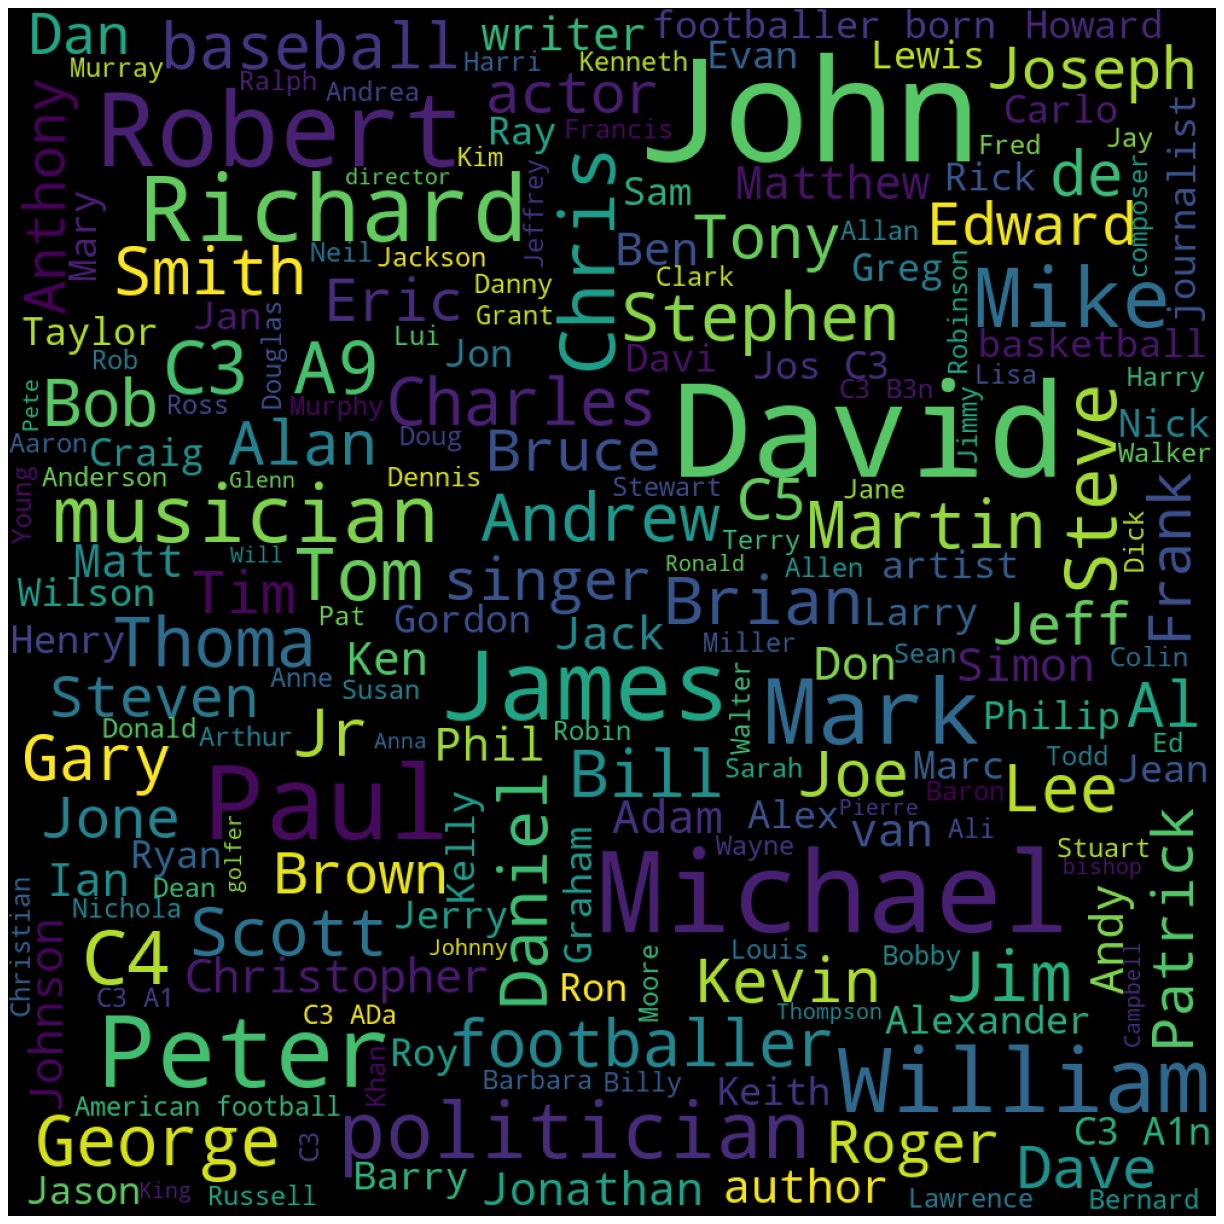

In [ ]:
allwords = " ".join([txt for txt in sf["name"].astype(str)])
wordCloud = WordCloud(width = 1000, height = 1000, random_state = 42, max_font_size = 119).generate(allwords)
plt.figure(figsize=(20, 20), dpi=80)
plt.imshow(wordCloud)
plt.axis('off')
plt.show()

In [ ]:
elton_word_count_table.topk('count', 10)

word,count
the,27.0
in,18.0
and,15.0
of,13.0
a,10.0
has,9.0
he,7.0
john,7.0
on,6.0
since,5.0


In [ ]:
elton_word_count_table

word,count
the,27.0
in,18.0
and,15.0
of,13.0
a,10.0
has,9.0
he,7.0
john,7.0
on,6.0
since,5.0


In [ ]:
elton_tfidf_table = elton[['tfidf']].stack('tfidf', new_column_name=['word', 'tfidf']).sort('tfidf', ascending=False)

elton_tfidf_table

word,tfidf
furnish,18.38947183999428
elton,17.482320270031995
billboard,17.30368095754203
john,13.93931279239831
songwriters,11.250406447031539
overallelton,10.986495389225194
tonightcandle,10.986495389225194
19702000,10.293348208665249
fivedecade,10.293348208665249
aids,10.262846934045534


In [ ]:
elton_tfidf_table.topk('tfidf', 10)

word,tfidf
furnish,18.38947183999428
elton,17.482320270031995
billboard,17.30368095754203
john,13.93931279239831
songwriters,11.250406447031539
overallelton,10.986495389225194
tonightcandle,10.986495389225194
19702000,10.293348208665249
fivedecade,10.293348208665249
aids,10.262846934045534


In [ ]:
victoria = sf[sf['name'] == 'Victoria Beckham']

In [ ]:
paul = sf[sf['name'] == 'Paul McCartney']

In [ ]:
dist_e = tc.distances.cosine(elton['tfidf'][0],victoria['tfidf'][0])
diest_p = tc.distances.cosine(elton['tfidf'][0],paul['tfidf'][0])

In [ ]:
dist_e

0.9567006376655429

In [ ]:
diest_p

0.8250310029221779

In [ ]:
knn = tc.nearest_neighbors.create(sf, features=['word_count'], label='name', distance='cosine')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [ ]:
knn_tf = tc.nearest_neighbors.create(sf, features=['tfidf'], label='name', distance='cosine')

Starting brute force nearest neighbors model training.

Validating distance components.

Initializing model data.

Initializing distances.

Done.

In [ ]:
most_sim_elton_wc = knn.query(elton)
most_sim_elton_wc.sort('distance', ascending=True)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 12.123ms     |

| Done         |         | 100         | 402.168ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Elton John,2.220446049250313e-16,1
0,Cliff Richard,0.16142415258967036,2
0,Sandro Petrone,0.16822542751041114,3
0,Rod Stewart,0.16832716558706107,4
0,Malachi O'Doherty,0.177315545978884,5


In [ ]:
elton_knn = knn_tf.query(elton)
elton_knn.sort('distance', ascending=True)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 21.674ms     |

| Done         |         | 100         | 434.901ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Elton John,-2.220446049250313e-16,1
0,Rod Stewart,0.7172196678927374,2
0,George Michael,0.7476009989692848,3
0,Sting (musician),0.7476719544306141,4
0,Phil Collins,0.7511932487904706,5


In [ ]:
elton_knn = knn_tf.query(elton)
elton_knn.sort('distance', ascending=False)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 12.906ms     |

| Done         |         | 100         | 443.781ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Phil Collins,0.7511932487904706,5
0,Sting (musician),0.7476719544306141,4
0,George Michael,0.7476009989692848,3
0,Rod Stewart,0.7172196678927374,2
0,Elton John,-2.220446049250313e-16,1


In [ ]:
vic_knn = knn.query(victoria)
vic_knn.sort('distance', ascending=True)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 9.783ms      |

| Done         |         | 100         | 382.149ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Victoria Beckham,-2.220446049250313e-16,1
0,Mary Fitzgerald (artist),0.20730703611504997,2
0,Adrienne Corri,0.21450978278754795,3
0,Beverly Jane Fry,0.21746646874079278,4
0,Raman Mundair,0.21769547499150488,5


In [ ]:
vic_knn = knn.query(victoria)
vic_knn.sort('distance', ascending=False)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 16.71ms      |

| Done         |         | 100         | 371.692ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Raman Mundair,0.21769547499150488,5
0,Beverly Jane Fry,0.21746646874079278,4
0,Adrienne Corri,0.21450978278754795,3
0,Mary Fitzgerald (artist),0.20730703611504997,2
0,Victoria Beckham,-2.220446049250313e-16,1


In [ ]:
vic_sim = knn_tf.query(victoria)
vic_sim.sort('distance', ascending=True)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 17.516ms     |

| Done         |         | 100         | 419.674ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Victoria Beckham,1.1102230246251565e-16,1
0,David Beckham,0.5481696102632145,2
0,Stephen Dow Beckham,0.7849867068283364,3
0,Mel B,0.8095855234085036,4
0,Caroline Rush,0.81982642291868,5


In [ ]:
vic_sim = knn_tf.query(victoria)
vic_sim.sort('distance', ascending=False)

Starting pairwise querying.

+--------------+---------+-------------+--------------+

| Query points | # Pairs | % Complete. | Elapsed Time |

+--------------+---------+-------------+--------------+

| 0            | 1       | 0.00169288  | 20.615ms     |

| Done         |         | 100         | 441.297ms    |

+--------------+---------+-------------+--------------+

query_label,reference_label,distance,rank
0,Caroline Rush,0.81982642291868,5
0,Mel B,0.8095855234085036,4
0,Stephen Dow Beckham,0.7849867068283364,3
0,David Beckham,0.5481696102632145,2
0,Victoria Beckham,1.1102230246251565e-16,1
